# <center> Credit Score Classification


<div>
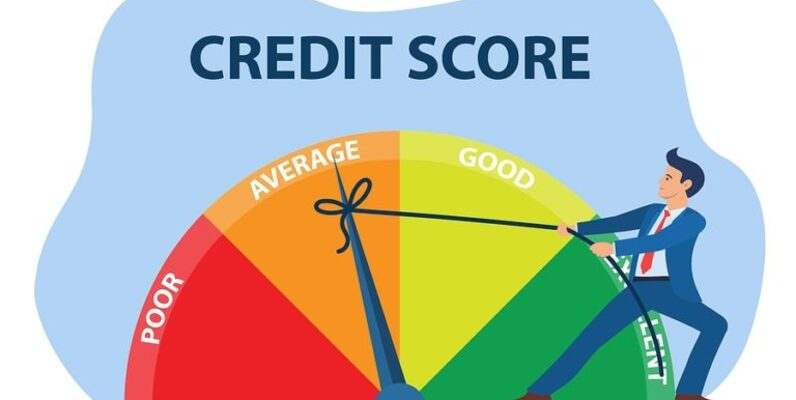
</div>

## Table of content 
- Packages importing 
- Reading Data 
- Data Exploration
- Data cleaning 
- Data Preprocessing 
- Modeling & Evaluation


## Packages importing 

In [17]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

## Reading Data 

In [18]:
df = pd.read_csv("dataset/train.csv",low_memory=False)

## Data Exploration

In [19]:
df.shape

(80002, 55)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80002 entries, 0 to 80001
Data columns (total 55 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          80002 non-null  int64  
 1   Age                                                 80002 non-null  float64
 2   Annual_Income                                       80002 non-null  float64
 3   Monthly_Inhand_Salary                               80002 non-null  float64
 4   Num_Bank_Accounts                                   80002 non-null  float64
 5   Num_Credit_Card                                     80002 non-null  float64
 6   Interest_Rate                                       80002 non-null  float64
 7   Num_of_Loan                                         80002 non-null  float64
 8   Delay_from_due_date                                 80002 non-null  float64


In [21]:
df.describe()

Unnamed: 0           Age  Annual_Income  Monthly_Inhand_Salary  \
count  80002.000000  80002.000000   80002.000000           80002.000000   
mean   40000.500000     33.368066   48023.572838            3978.309489   
std    23094.732455     10.603641   34804.819663            2879.262421   
min        0.000000     14.000000    7005.930000             319.556250   
25%    20000.250000     25.000000   19370.480000            1626.525000   
50%    40000.500000     33.000000   37240.220000            3074.170000   
75%    60000.750000     41.000000   68636.440000            5712.553333   
max    80001.000000     56.000000  152574.760000           12461.296667   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  \
count       80002.000000     80002.000000   80002.000000  80002.000000   
mean            5.372966         5.529262      14.523812      3.529462   
std             2.567194         2.040649       8.647578      2.394142   
min             0.000000         1.000000       1.000000      0.000000   
25%             3.000000         4.000000       8.000000      2.000000   
50%             6.000000         5.000000      13.000000      3.000000   
75%             7.000000         7.000000      20.000000      5.000000   
max            11.000000        11.000000      34.000000      9.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Monthly_Balance  \
count         80002.000000            80002.000000  ...     80002.000000   
mean             19.422452               13.326479  ...       353.772655   
std              12.618740                6.287154  ...       134.484468   
min              -5.000000               -3.000000  ...         0.007760   
25%              10.000000                9.000000  ...       270.867739   
50%              18.000000               14.000000  ...       334.874368   
75%              26.000000               18.000000  ...       411.606764   
max              55.000000               28.000000  ...       767.618711   

       Credit_Score  Credit-Builder Loan  Personal Loan  \
count  80002.000000         80002.000000   80002.000000   
mean       0.883265             0.359891       0.349216   
std        0.674837             0.479971       0.476725   
min        0.000000             0.000000       0.000000   
25%        0.000000             0.000000       0.000000   
50%        1.000000             0.000000       0.000000   
75%        1.000000             1.000000       1.000000   
max        2.000000             1.000000       1.000000   

       Debt Consolidation Loan  Student Loan   Payday Loan  Mortgage Loan  \
count             80002.000000  80002.000000  80002.000000   80002.000000   
mean                  0.349591      0.354516      0.367391       0.357091   
std                   0.476844      0.478369      0.482097       0.479145   
min                   0.000000      0.000000      0.000000       0.000000   
25%                   0.000000      0.000000      0.000000       0.000000   
50%                   0.000000      0.000000      0.000000       0.000000   
75%                   1.000000      1.000000      1.000000       1.000000   
max                   1.000000      1.000000      1.000000       1.000000   

          Auto Loan  Home Equity Loan  
count  80002.000000      80002.000000  
mean       0.344991          0.354891  
std        0.475368          0.478483  
min        0.000000          0.000000  
25%        0.000000          0.000000  
50%        0.000000          0.000000  
75%        1.000000          1.000000  
max        1.000000          1.000000  

[8 rows x 28 columns]

In [22]:
df.duplicated().sum()

0

### Identify issues 
1. ~~ID, Name and SSN (Not useful)~~
2. Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance __Numerical but show as catogery (need to be fixed)__
3. Occupation, Credit_Mix has value "_____"
4. Data contains outliers 
5. Num_Credit_Card has __zeros__
6. Type_of_Loan Need to rewrite as 8 columns 
7. Num_Bank_Accounts contains negative values
8. Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
9. Target Columns is Imbalanced
10. A lot of missing data 

## Data cleaning

#### removing unuseful Columns (Uniques)

In [ ]:
del df['ID'] # Identification 
del df['Name'] # Name of client 
del df['SSN'] # SSN (social security number of a person)

#### Fix Numerical Columns 

1. replace _  
2. convert into float 

In [ ]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [ ]:
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [ ]:
for col in N_to_fix :
    df[col] = df[col].apply(fix_nums)

### Type_of_Loan

In [ ]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

#### Num_Bank_Accounts

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

#### Num_Credit_Card

In [ ]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

#### Credit_History_Age

In [ ]:
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

#### Payment_of_Min_Amount

In [ ]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

#### Payment_Behaviour

In [ ]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

### Occupation

In [ ]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object')

In [ ]:
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)

Customer_ID     Month   Age    Occupation  Annual_Income  \
24  CUS_0xb891   January  54.0  Entrepreneur       30689.89   
25  CUS_0xb891  February  54.0  Entrepreneur       30689.89   
26  CUS_0xb891     March  55.0  Entrepreneur       30689.89   
27  CUS_0xb891     April  55.0  Entrepreneur       30689.89   
28  CUS_0xb891       May  55.0  Entrepreneur       30689.89   
29  CUS_0xb891      June  55.0  Entrepreneur       30689.89   
30  CUS_0xb891      July  55.0  Entrepreneur       30689.89   
31  CUS_0xb891    August  55.0  Entrepreneur       30689.89   

    Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
24            2612.490833                  2                5              4   
25            2612.490833                  2                5              4   
26            2612.490833                  2                5              4   
27            2612.490833                  2                5              4   
28            2612.490833                  2                5              4   
29            2612.490833                  2                5              4   
30            2612.490833                  2                5              4   
31            2612.490833                  2                5              4   

    Num_of_Loan  ...  Monthly_Balance  Credit_Score  Credit-Builder Loan  \
24          1.0  ...       433.604773      Standard                False   
25          1.0  ...       409.951812      Standard                False   
26          1.0  ...       411.427123      Standard                False   
27          1.0  ...       262.499594      Standard                False   
28          1.0  ...       359.374916      Standard                False   
29          1.0  ...       419.880784      Standard                False   
30          1.0  ...       443.549957      Standard                False   
31       -100.0  ...       379.216381      Standard                False   

    Personal Loan Debt Consolidation Loan  Student Loan  Payday Loan  \
24          False                   False         False        False   
25          False                   False         False        False   
26          False                   False         False        False   
27          False                   False         False        False   
28          False                   False         False        False   
29          False                   False         False        False   
30          False                   False         False        False   
31          False                   False         False        False   

    Mortgage Loan Auto Loan  Home Equity Loan  
24          False     False             False  
25          False     False             False  
26          False     False             False  
27          False     False             False  
28          False     False             False  
29          False     False             False  
30          False     False             False  
31          False     False             False  

[8 rows x 32 columns]

In [ ]:
for ID in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)

In [ ]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: Occupation, dtype: int64

In [ ]:
df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])

In [ ]:
df['Occupation'].value_counts()

Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

#### Credit_Mix

In [ ]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

### Advanced Handling Missing Data 

In [ ]:
# Edit Columns from bool to int 
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [ ]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [ ]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [ ]:
for col in Numericals[1:]:
    imputer.fit(df[['Customer_ID',col]])
    df[['Customer_ID',col]] = imputer.transform(df[['Customer_ID',col]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

### Handling Outliers 

In [ ]:
## replace Outliers with median 
for col in Numericals :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

# Data Preprocessing

### Handling Catogerical 

In [ ]:
df.select_dtypes(include="object")

Month Occupation Payment_of_Min_Amount  \
0       January  Scientist                    No   
1      February  Scientist                    No   
2         March  Scientist                    No   
3         April  Scientist                    No   
4           May  Scientist                    No   
...         ...        ...                   ...   
99995     April   Mechanic                    No   
99996       May   Mechanic                    No   
99997      June   Mechanic                    No   
99998      July   Mechanic                    No   
99999    August   Mechanic                    No   

                      Payment_Behaviour Credit_Score  
0       High_spent_Small_value_payments         Good  
1        Low_spent_Large_value_payments         Good  
2       Low_spent_Medium_value_payments         Good  
3        Low_spent_Small_value_payments         Good  
4      High_spent_Medium_value_payments         Good  
...                                 ...          ...  
99995   High_spent_Large_value_payments         Poor  
99996  High_spent_Medium_value_payments         Poor  
99997   High_spent_Large_value_payments         Poor  
99998    Low_spent_Large_value_payments     Standard  
99999    Low_spent_Small_value_payments         Poor  

[100000 rows x 5 columns]

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [ ]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [ ]:
del df['Customer_ID']

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [ ]:
# df.to_csv("Preprocessed_Data.csv")

In [ ]:
df = pd.read_csv("../input/credit-score-data-preprocessed/Preprocessed_Data.csv",low_memory=False)

### Data Spliting 
- Try Resampling 

In [ ]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

## Apply oversampling
- Data is Not 100% balanced, Let's try improving it. 

In [ ]:
y.value_counts(normalize=True)

1    0.53174
0    0.28998
2    0.17828
Name: Credit_Score, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [ ]:
y_data_rus.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Credit_Score, dtype: float64

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

### Handling Numerical 
- Using Power transformer to avoid Data Skewness

In [ ]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [ ]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Modeling and Evaluation


#### Model Building

In [ ]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model fitting

In [ ]:
model.fit(X_train, y_train)

[06:19:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[06:25:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:25:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:25:17] WARNING: ../src/learner.cc:1095: 

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytr...
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                              

#### model evaluation

In [ ]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9988447588769982


In [ ]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8504085086821155


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     15488
           1       0.81      0.79      0.80     16284
           2       0.90      0.89      0.89     16085

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



#### model Saving

In [ ]:
# joblib.dump(model,'model.h5')
# joblib.dump(scalar,'scalar.h5')